In [1]:
import sys
import re
import string
import os
import csv
from itertools import islice
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/EECS4412/'
champions = 'wc_champions.csv'
matches = 'wc_atches.csv'
players = 'wc_players.csv'

# read the csv file and return the header and data
def readfile(path, csvName):
  f = open(path + csvName)
  csvreader = csv.reader(f)
  tags = []
  header = next(csvreader)
  rows = []
  for row in csvreader:
    rows.append(row)  
  f.close()
  return header, rows

#retrive a column in a table
def retrieve(header, rows, column):
  index = header.index(column)
  result = []
  for r in rows:
    result.append(r[index])
  return result


Mounted at /content/drive


In [2]:
header, rows = readfile(drive_path, champions)
champs = retrieve(header, rows, 'champion')
print(champs)

["Kai'Sa", 'Lee Sin', 'Xayah', 'Nautilus', 'Gragas', 'Rakan', 'Gangplank', 'Ryze', 'Akali', 'Thresh', 'Renekton', 'Elise', 'Syndra', 'Ezreal', 'Kayle', 'Qiyana', "Rek'Sai", 'LeBlanc', 'Leona', 'Jayce', 'Gnar', 'Tristana', 'Jarvan IV', 'Vladimir', 'Lucian', 'Yasuo', 'Galio', 'Camille', 'Alistar', 'Orianna', 'Yuumi', 'Pyke', 'Nocturne', 'Aatrox', 'Ornn', 'Olaf', 'Taliyah', 'Varus', 'Kled', 'Morgana', 'Twisted Fate', 'Cassiopeia', 'Corki', 'Blitzcrank', 'Garen', 'Irelia', 'Shen', 'Skarner', 'Kennen', 'Tahm Kench', 'Heimerdinger', 'Sion', 'Lissandra', 'Neeko', 'Veigar', 'Mordekaiser', 'Rumble', "Cho'Gath", 'Zoe', 'Azir', 'Ekko', 'Karthus', 'Ashe', 'Fiora', 'Karma', 'Quinn', 'Sivir', 'Caitlyn', 'Draven', 'Jinx', 'Poppy', 'Fiddlesticks', 'Vayne', 'Hecarim', 'Jhin', "Kha'Zix", 'Lulu', 'Sejuani', 'Sylas', 'Jax', "Kog'Maw", 'Malphite', 'Pantheon', 'Urgot', 'Yorick', 'Anivia', 'Bard', 'Braum', 'Lux', 'Nidalee', 'Rengar', 'Sona', 'Vi', 'Viktor', 'Volibear', 'Xin Zhao', 'Ziggs', 'Zilean']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


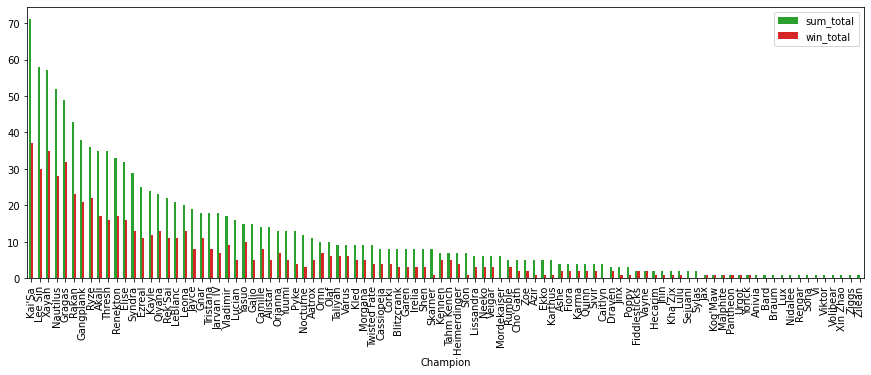

In [3]:
import pandas
from google.colab import drive
import pandas
import matplotlib.pyplot as plt
drive.mount('/content/drive')
points = pandas.read_csv('/content/drive/MyDrive/EECS4412/wc_champions.csv')


x = points['champion'].values
y1 = points['sum_total'].values
y2 = points['win_total'].values



df = pandas.DataFrame({'Champion':x, 'sum_total':y1, 'win_total':y2})

df[["sum_total", "win_total","Champion"]].plot(x='Champion', rot=0,figsize=(15,5),color = ["C2","C3"],kind="bar")

plt.xticks(rotation=90)
plt.show()


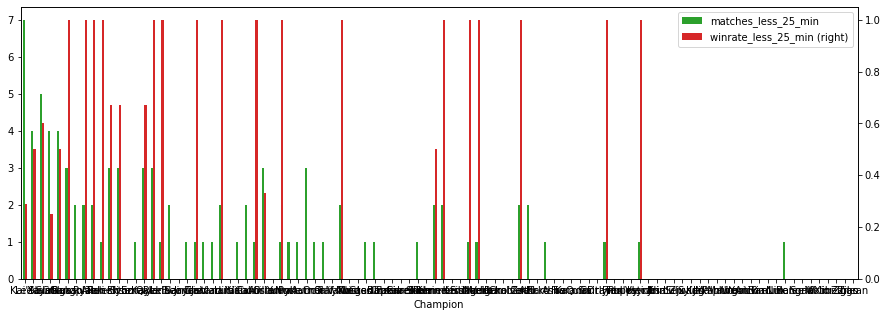

In [4]:

y3 = points['matches_less_25_min'].values
y4 = points['winrate_less_25_min'].values

df = pandas.DataFrame({'Champion':x, 'matches_less_25_min':y3, 'winrate_less_25_min':y4})

df['winrate_less_25_min'] = df['winrate_less_25_min'].str.rstrip('%').astype('float') / 100.0
df[["matches_less_25_min","winrate_less_25_min","Champion" ]].plot(x='Champion', rot=0,figsize=(15,5), secondary_y= "winrate_less_25_min", color = ["C2","C3"],kind="bar")

plt.xticks(rotation=90)
plt.show()


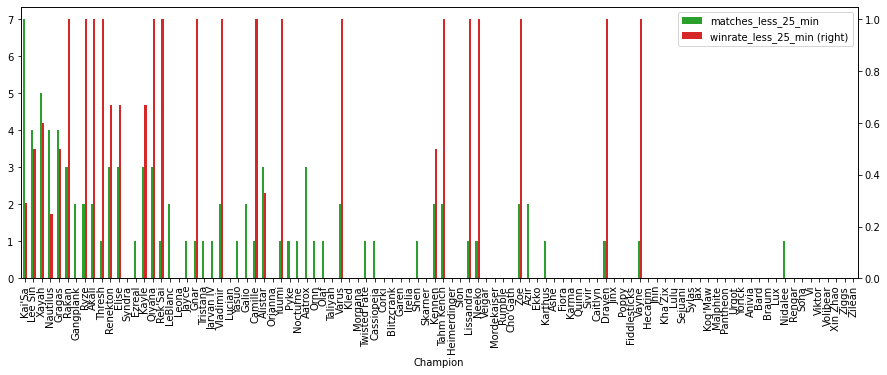

In [5]:
# task 1.2
y3 = points['matches_less_25_min'].values
y4 = points['winrate_less_25_min'].values

df = pandas.DataFrame({'Champion':x, 'matches_less_25_min':y3, 'winrate_less_25_min':y4})

df['winrate_less_25_min'] = df['winrate_less_25_min'].str.rstrip('%').astype('float') / 100.0
ax = df.plot(x='Champion', rot=90,figsize=(15,5),secondary_y="winrate_less_25_min", color = ["C2","C3"],kind="bar")

plt.show()

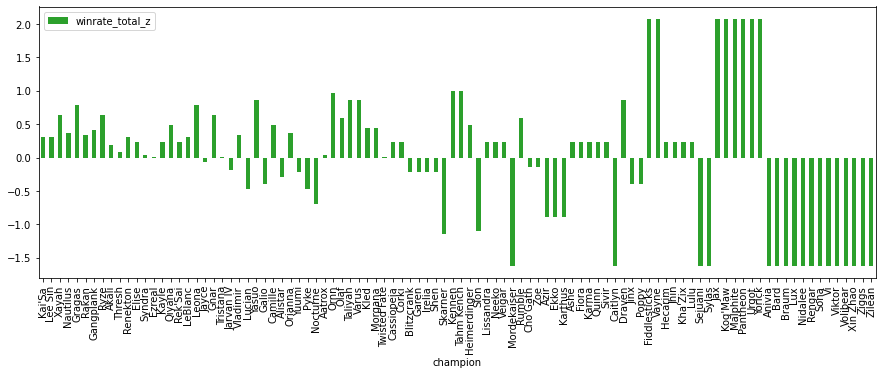

In [6]:
#Task3 winrate_total(ratio)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


playerdata = pandas.read_csv('/content/drive/MyDrive/EECS4412/wc_champions.csv');
playerdata = pd.DataFrame(playerdata)
selecty = playerdata['winrate_total'].str.rstrip('%').astype('float') / 100.0
selecty = stats.zscore(selecty)
playerdata['winrate_total_z'] = pd.DataFrame(selecty)
final = playerdata[['champion', 'winrate_total_z']]
final[['champion','winrate_total_z']].plot(x='champion', rot=0,figsize=(15,5),color = ["C2","C3"],kind="bar")
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.show()

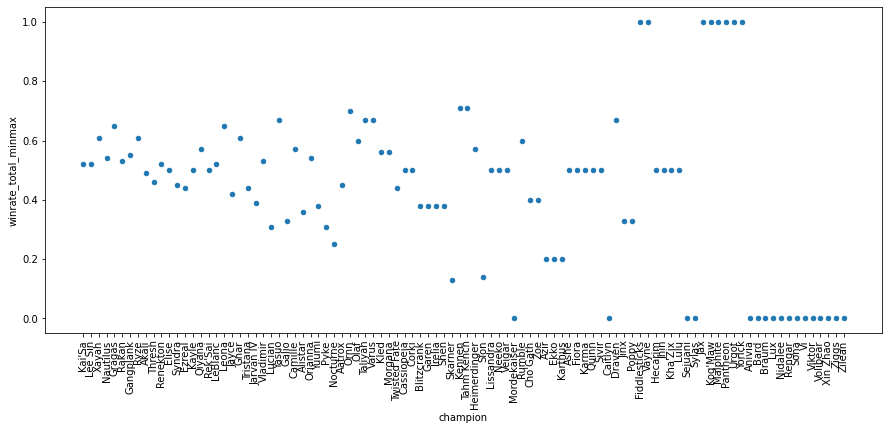

In [7]:
#Task3 winrate_total(ratio)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
from sklearn import preprocessing


playerdata = pandas.read_csv('/content/drive/MyDrive/EECS4412/wc_champions.csv');
playerdata = pd.DataFrame(playerdata)
selecty = playerdata['winrate_total'].str.rstrip('%').astype('float') / 100.0
x = selecty.values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
selecty_scaled = min_max_scaler.fit_transform(x)
playerdata['winrate_total_minmax'] = pd.DataFrame(selecty_scaled)
#ax1 = playerdata.plot.scatter(x='champion', y='winrate_total_minmax', c='red')
playerdata[['champion','winrate_total_minmax']].plot(x='champion',y='winrate_total_minmax', rot=0,figsize=(15,6),kind="scatter")
plt.xticks(rotation=90)
#plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(fontsize=10 )
#plt.tight_layout()
plt.show()

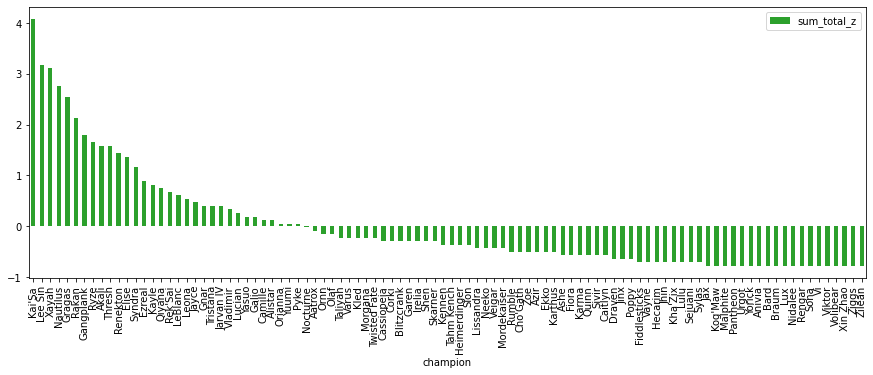

In [8]:
#Task3 sum_total(Interval)
playerdata = pandas.read_csv('/content/drive/MyDrive/EECS4412/wc_champions.csv');
playerdata = pd.DataFrame(playerdata)
selecty = playerdata['sum_total']
selecty = stats.zscore(selecty)
playerdata['sum_total_z'] = pd.DataFrame(selecty)
final = playerdata[['champion', 'sum_total_z']]
final[['champion','sum_total_z']].plot(x='champion', rot=0,figsize=(15,5),color = ["C2","C3"],kind="bar")
plt.xticks(rotation=90)
plt.xticks(fontsize=10 )
plt.show()

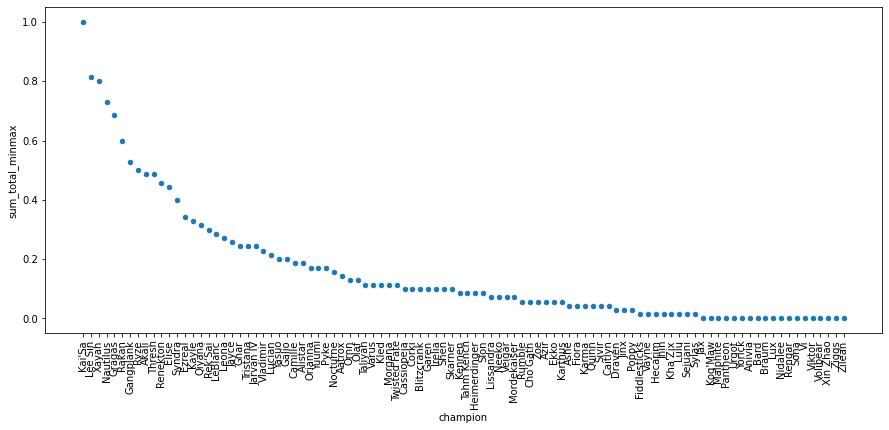

In [9]:
#Task3 sum_total(Interval)
playerdata = pandas.read_csv('/content/drive/MyDrive/EECS4412/wc_champions.csv');
playerdata = pd.DataFrame(playerdata)
selecty = playerdata['sum_total']
x = selecty.values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
selecty_scaled = min_max_scaler.fit_transform(x)
playerdata['sum_total_minmax'] = pd.DataFrame(selecty_scaled)
playerdata[['champion','sum_total_minmax']].plot(x='champion',y='sum_total_minmax', rot=0,figsize=(15,6),kind="scatter")
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
#plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

playercsv = pandas.read_csv('/content/drive/MyDrive/EECS4412/wc_players.csv');
playercsv = pd.DataFrame(playercsv)
selectd = playercsv[['k','d','a','teamkills','teamdeaths','fbtime','fdtime','kpm','gamelength','teamdragkills']]
#kill, death, asist, team kills, team deaths, first blood time, kill per mins, game length, first dead time, team drag kills

sc = StandardScaler()
selectd_fit = sc.fit_transform(selectd)
pca = PCA()
output = pca.fit_transform(selectd_fit)
outputDf = pd.DataFrame(data = output, columns = ['PCs_1', 'PCs_2','PCs_3','PCs_4','PCs_5','PCs_6','PCs_7','PCs_8','PCs_9','PCs_10'])
#outputDf = pd.DataFrame(output)
outputtran = pandas.DataFrame.transpose(outputDf)
print(outputtran)
#outputDf.head()
#max = outputDf.max(axis=1)
#print(max)

            0         1         2     ...      1187      1188      1189
PCs_1  -2.347315 -1.872859 -1.875595  ... -1.572361 -0.483346 -1.572361
PCs_2   0.890257  0.873345  1.231215  ... -1.816698 -2.358062 -1.816698
PCs_3   0.242599  0.584920  0.515075  ... -0.859954  0.479129 -0.859954
PCs_4   0.644679  0.537906  0.475400  ... -2.109134 -2.474312 -2.109134
PCs_5  -0.433026 -0.448100 -0.518818  ...  1.290621  1.382547  1.290621
PCs_6  -0.431132 -0.590534 -0.843725  ... -0.595225 -0.435555 -0.595225
PCs_7  -0.275590 -0.189095 -0.446916  ... -0.175816  0.125140 -0.175816
PCs_8  -0.779711 -0.714473 -0.461456  ... -0.125817 -0.229011 -0.125817
PCs_9  -0.086818 -0.390901 -0.569526  ...  0.327420  0.047769  0.327420
PCs_10 -0.091469 -0.040116 -0.046648  ... -0.017842  0.029857 -0.017842

[10 rows x 1190 columns]


In [37]:
list = []
n = outputtran.nlargest(2,0)
#print(n)
for row in n.index:
    #print(row, end = " ")
    list.append(row)

n1 = outputtran.nlargest(2,1)
#print(n1)
for row in n1.index:
    #print(row, end = " ")
    list.append(row)

n2 = outputtran.nlargest(2,2)
#print(n2)
for row in n2.index:
    #print(row, end = " ")
    list.append(row)

n3 = outputtran.nlargest(2,3)
#print(n3)
for row in n3.index:
    #print(row, end = " ")
    list.append(row)

n4 = outputtran.nlargest(2,4)
#print(n4)
for row in n4.index:
    #print(row, end = " ")
    list.append(row)

n5 = outputtran.nlargest(2,5)
#print(n5)
for row in n5.index:
    #print(row, end = " ")
    list.append(row)

n6 = outputtran.nlargest(2,6)
#print(n6)
for row in n6.index:
    #print(row, end = " ")
    list.append(row)

n7 = outputtran.nlargest(2,7)
#print(n7)
for row in n7.index:
    #print(row, end = " ")
    list.append(row)

n8 = outputtran.nlargest(2,8)
#print(n8)
for row in n8.index:
    #print(row, end = " ")
    list.append(row)

n9 = outputtran.nlargest(2,9)
#print(n9)
for row in n9.index:
    #print(row, end = " ")
    list.append(row)
no0 = 0
no1 = 0
no2 = 0
no3 = 0
no4 = 0
no5 = 0
no6 = 0
no7 = 0
no8 = 0
no9 = 0
for index in range(len(list)):
  if list[index]=='PCs_1':
    no0+=1
  elif list[index]=='PCs_2':
    no1+=1
  elif list[index]=='PCs_3':
    no2+=1
  elif list[index]=='PCs_4':
    no3+=1
  elif list[index]=='PCs_5':
    no4+=1
  elif list[index]=='PCs_6':
    no5+=1
  elif list[index]=='PCs_7':
    no6+=1
  elif list[index]=='PCs_8':
    no7+=1
  elif list[index]=='PCs_9':
    no8+=1
  elif list[index]=='PCs_10':
    no9+=1
print("The number of biggest value is PCs_1:",no0)
print("The number of biggest value is PCs_2:",no1)
print("The number of biggest value is PCs_3:",no2)
print("The number of biggest value is PCs_4:",no3)
print("The number of biggest value is PCs_5:",no4)
print("The number of biggest value is PCs_6:",no5)
print("The number of biggest value is PCs_7:",no6)
print("The number of biggest value is PCs_8:",no7)
print("The number of biggest value is PCs_9:",no8)
print("The number of biggest value is PCs_10:",no9)

The number of biggest value is PCs_1: 5
The number of biggest value is PCs_2: 5
The number of biggest value is PCs_3: 6
The number of biggest value is PCs_4: 4
The number of biggest value is PCs_5: 0
The number of biggest value is PCs_6: 0
The number of biggest value is PCs_7: 0
The number of biggest value is PCs_8: 0
The number of biggest value is PCs_9: 0
The number of biggest value is PCs_10: 0


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

playercsv = pandas.read_csv('/content/drive/MyDrive/EECS4412/wc_players.csv');
playercsv = pd.DataFrame(playercsv)
selectda = playercsv[['d','a']]
#kill, death, asist, team kills, team deaths, first blood time, kill per mins, game length, first dead time, team drag kills

sc = StandardScaler()
selectd_fit1 = sc.fit_transform(selectda)
pca = PCA(n_components=2)
output1 = pca.fit_transform(selectd_fit1)

fig = px.scatter(output1, x=0, y=1, color=selectda['d'],labels={'0': 'PCs_2', '1': 'PCs_3'})
fig.show()
